In [ ]:
import pathlib
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
work_path1 = pathlib.Path.cwd()

data_path1 = Path(work_path1, 'data_freq_undersampling_train.csv')
train_data = pd.read_csv(data_path1)
train_data.shape

(80655, 105)

In [ ]:
work_path2 = pathlib.Path.cwd()

data_path2 = Path(work_path2, 'data_freq_undersampling_test.csv')
test_data = pd.read_csv(data_path2)
test_data.shape

(26885, 105)

In [ ]:
train_data = train_data.drop(columns = ['SK_ID_CURR'])
test_data = test_data.drop(columns = ['SK_ID_CURR'])

In [ ]:
test_data

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EDUCATION_SCORE,TARGET
0,0.909689,0.357858,0.334015,0.696745,0,180000.0,1066320.0,38430.0,900000.0,0.814915,...,0,0,0.0,0.0,0.0,1.0,0.0,4.0,2,0
1,0.909689,0.357858,0.334015,0.696745,0,112500.0,113760.0,7533.0,90000.0,0.814915,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4,0
2,0.909689,0.357858,0.334015,0.696745,2,157500.0,1035072.0,36801.0,864000.0,0.814915,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
3,0.909689,0.357858,0.665985,0.303255,1,450000.0,790830.0,62613.0,675000.0,0.814915,...,0,0,0.0,0.0,0.0,1.0,0.0,3.0,4,0
4,0.909689,0.642142,0.665985,0.696745,0,202500.0,283500.0,13765.5,283500.0,0.036898,...,0,0,0.0,0.0,0.0,0.0,0.0,5.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26880,0.909689,0.357858,0.665985,0.696745,0,153000.0,1288350.0,37800.0,1125000.0,0.814915,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2,1
26881,0.909689,0.357858,0.665985,0.303255,0,76500.0,521280.0,28408.5,450000.0,0.814915,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
26882,0.909689,0.357858,0.665985,0.696745,1,135000.0,104256.0,11074.5,90000.0,0.814915,...,0,0,0.0,0.0,0.0,0.0,0.0,4.0,4,0
26883,0.909689,0.642142,0.665985,0.303255,0,31500.0,450000.0,30442.5,450000.0,0.814915,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,0


In [ ]:
test_features = ['TARGET']
train_features = [item for item in train_data.columns if item not in test_features]

In [ ]:
X_train_null = train_data[train_features]
X_test_null = test_data[train_features]
y_train_null = train_data['TARGET']
y_test_null = test_data['TARGET']

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)

model.fit(X_train_null, y_train_null)

y_pred = model.predict(X_test_null)

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

print('F1 score:', f1_score(y_test_null, y_pred))
print('roc_auc_score:', roc_auc_score(y_test_null, y_pred))
print('precision_score:', precision_score(y_test_null, y_pred))
print('recall_score:', recall_score(y_test_null, y_pred))


F1 score: 0.20768623321926824
roc_auc_score: 0.5502831859422247
precision_score: 0.6087962962962963
recall_score: 0.12519834973024438


In [ ]:
feature_scores = pd.Series(model.feature_importances_, index=X_train_null.columns).sort_values(ascending=False)

feature_scores

EXT_SOURCE_2         0.073275
EXT_SOURCE_3         0.064624
DAYS_BIRTH           0.040799
DAYS_ID_PUBLISH      0.038097
DAYS_REGISTRATION    0.036967
                       ...   
FLAG_DOCUMENT_17     0.000004
FLAG_DOCUMENT_10     0.000000
FLAG_DOCUMENT_4      0.000000
FLAG_MOBIL           0.000000
FLAG_DOCUMENT_12     0.000000
Length: 103, dtype: float64

In [ ]:
feature_scores = feature_scores[:20]

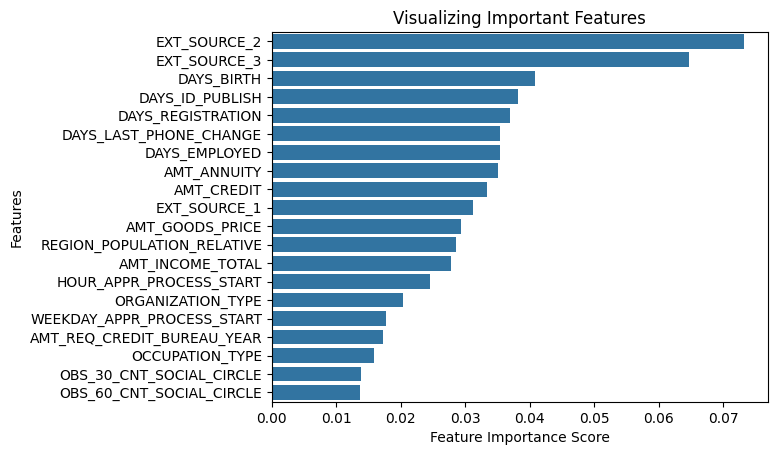

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 9.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2306: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2307: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

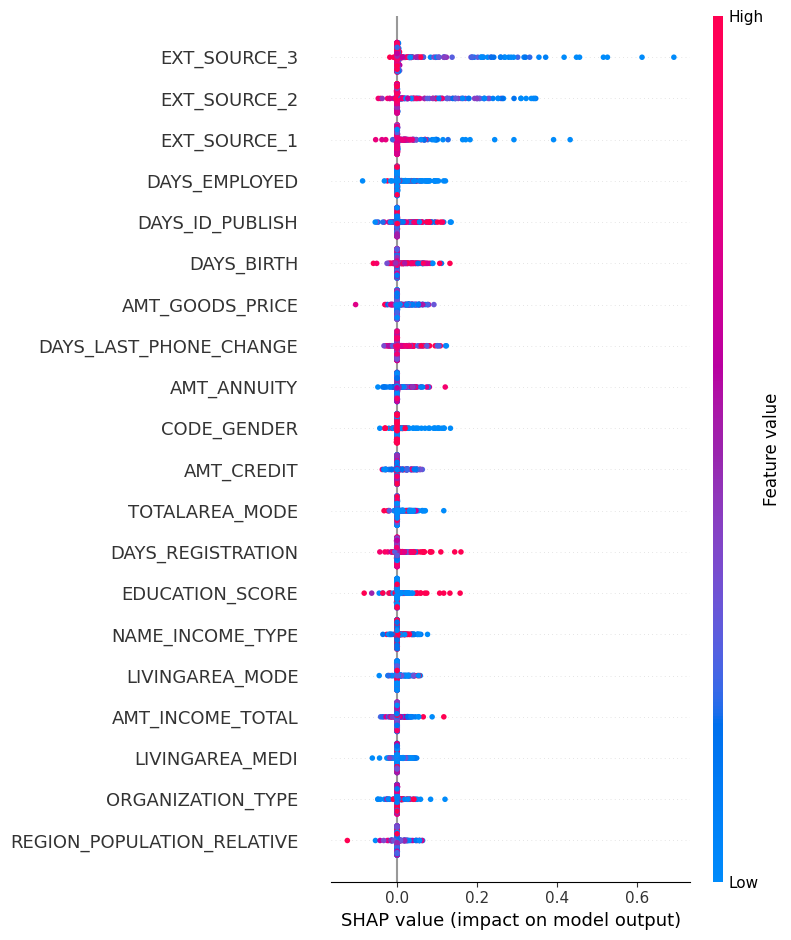

In [ ]:
import shap

# SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.
def f_wrapper(X):
    return model.predict(X).flatten()

# Too many input data - use a random slice
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train_null, 20)

# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,X_train_summary)

# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
X_train_sample = X_train_null.sample(400)
shap_values = explainer.shap_values(X_train_sample)
shap.summary_plot(shap_values, X_train_sample)

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_null, y_train_null)

y_pred_xgb = model_xgb.predict(X_test_null)

In [ ]:
print('F1 score:', f1_score(y_test_null, y_pred_xgb))
print('roc_auc_score:', roc_auc_score(y_test_null, y_pred_xgb))
print('precision_score:', precision_score(y_test_null, y_pred_xgb))
print('recall_score:', recall_score(y_test_null, y_pred_xgb))

F1 score: 0.30657266317944054
roc_auc_score: 0.5791602508243014
precision_score: 0.5409309791332263
recall_score: 0.21390034909552522


In [ ]:
feature_scores_xgb = pd.Series(model_xgb.feature_importances_, index=X_train_null.columns).sort_values(ascending=False)

feature_scores_xgb = feature_scores_xgb[:20]

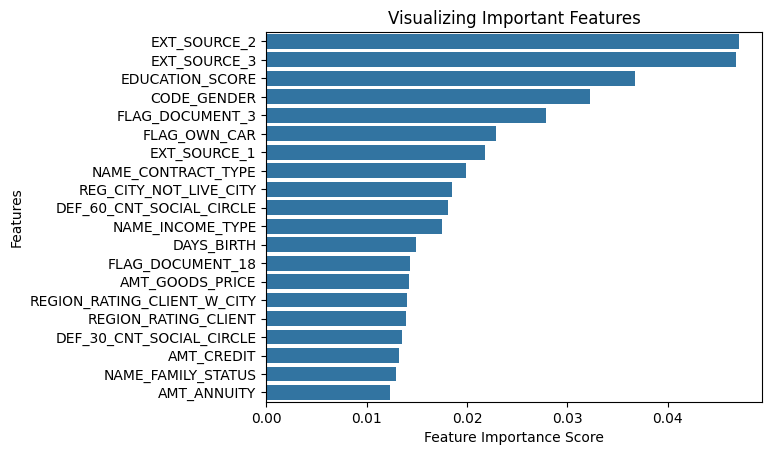

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores_xgb, y=feature_scores_xgb.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

  0%|          | 0/400 [00:00<?, ?it/s]

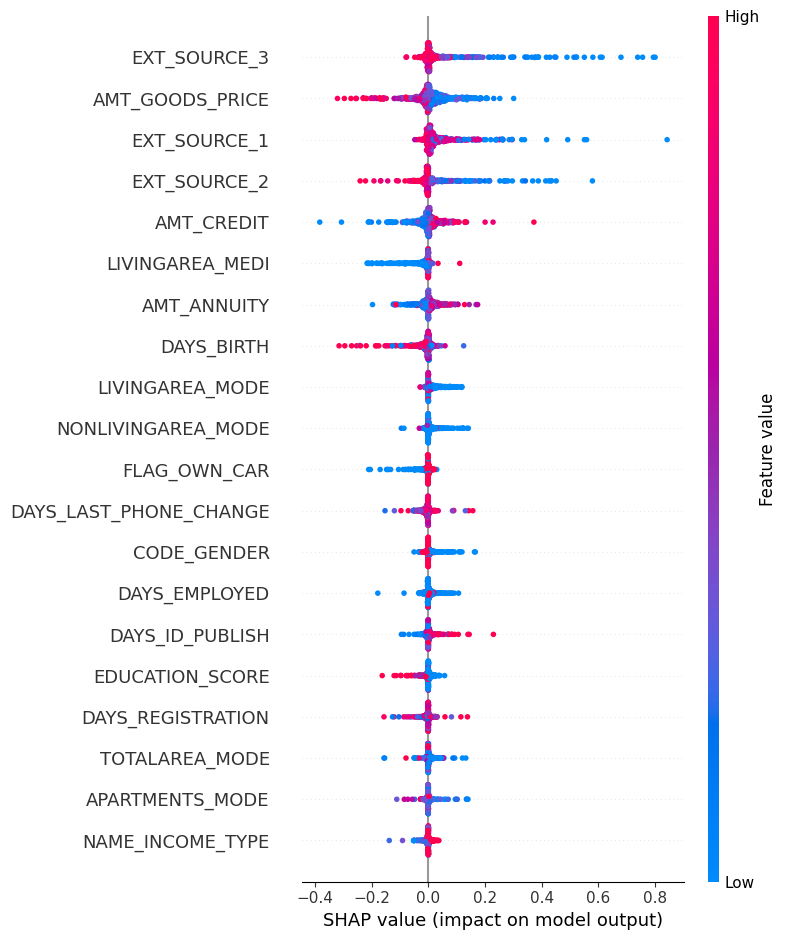

In [ ]:
import shap

# SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.
def f_wrapper(X):
    return model_xgb.predict(X).flatten()

# Too many input data - use a random slice
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train_null, 20)

# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,X_train_summary)

# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
X_train_sample = X_train_null.sample(400)
shap_values  = explainer.shap_values(X_train_sample)
shap.summary_plot(shap_values, X_train_sample)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='newton-cholesky')
lr_clf.fit(X_train_null, y_train_null)

y_pred_lr = lr_clf.predict(X_test_null)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.43235e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [ ]:
print('F1 score:', f1_score(y_test_null, y_pred_lr))
print('roc_auc_score:', roc_auc_score(y_test_null, y_pred_lr))
print('precision_score:', precision_score(y_test_null, y_pred_lr))
print('recall_score:', recall_score(y_test_null, y_pred_lr))

F1 score: 0.0009510223490252021
roc_auc_score: 0.5001408521108266
precision_score: 0.42857142857142855
recall_score: 0.0004760393525864805


<Axes: ylabel='Feature'>

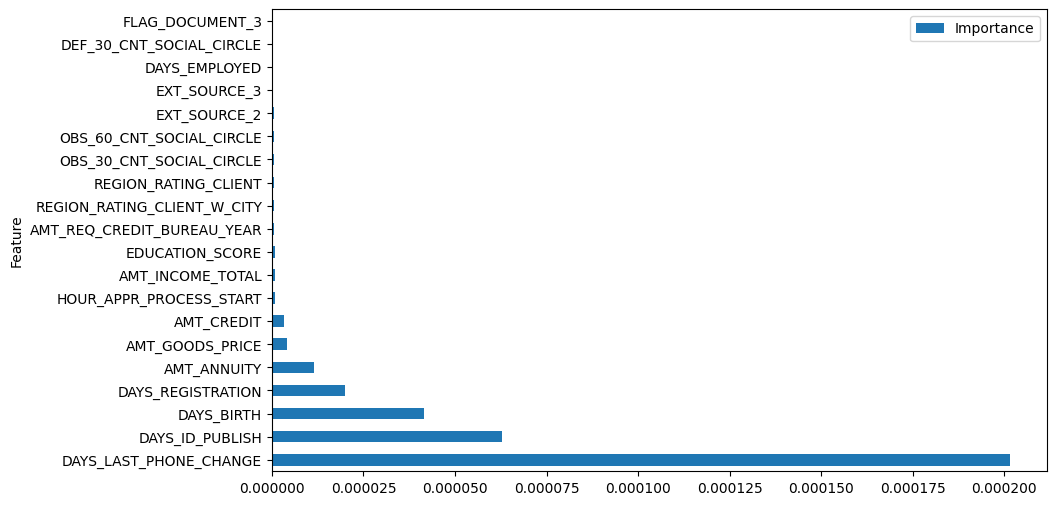

In [ ]:
coefficients = lr_clf.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train_null.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance = feature_importance[:20]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

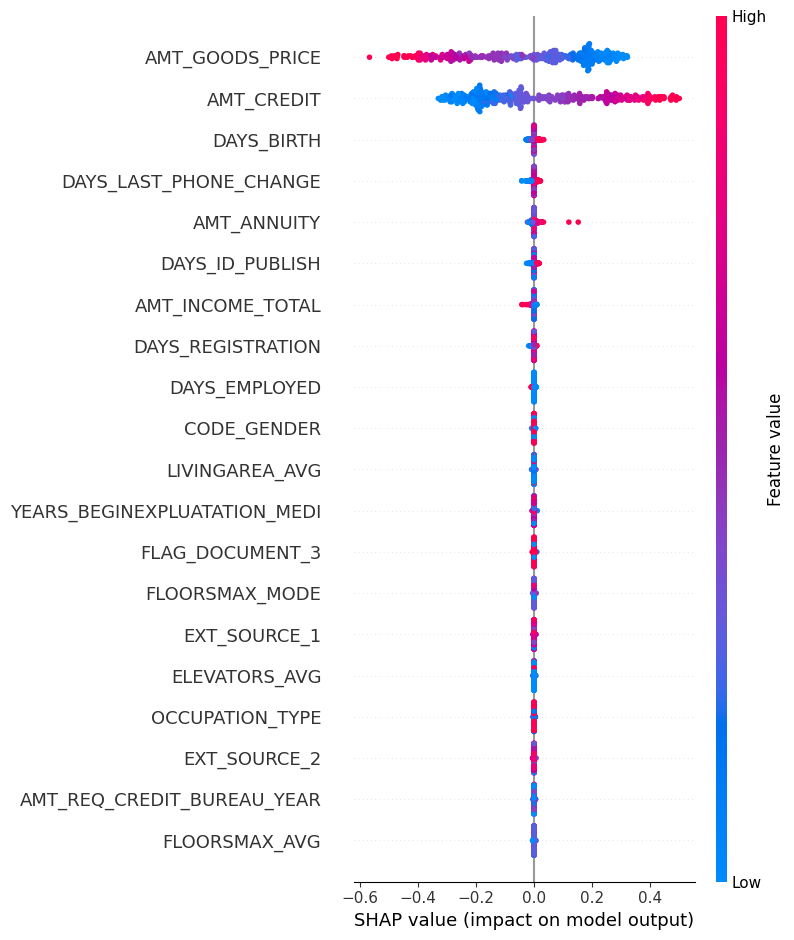

In [ ]:
import shap

# SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.
def f_wrapper(X):
    return lr_clf.predict(X).flatten()

# Too many input data - use a random slice
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train_null, 20)

# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,X_train_summary)

# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
X_train_sample = X_train_null.sample(400)
shap_values  = explainer.shap_values(X_train_sample)
shap.summary_plot(shap_values, X_train_sample)

**Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [ ]:
hidden_units=100
learning_rate=0.01
hidden_layer_act='relu'
output_layer_act='sigmoid'
no_epochs=7

In [ ]:
model_nn = Sequential()

In [ ]:
model_nn.add(Dense(hidden_units, input_dim=103, activation=hidden_layer_act))
model_nn.add(Dense(hidden_units, activation=hidden_layer_act))
model_nn.add(Dense(1, activation=output_layer_act))

In [ ]:
from keras import backend as K

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [ ]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
sgd=optimizers.Adam()
model_nn.compile(loss='binary_crossentropy',optimizer=sgd, metrics=[recall_m, precision_m, f1_m])

In [ ]:
model_nn.fit(X_train_null, y_train_null, epochs=no_epochs, batch_size=len(X_train_null),  verbose=2)

Epoch 1/7
1/1 - 1s - loss: 1236.8234 - recall_m: 0.4950 - precision_m: 0.2744 - f1_m: 0.3531 - 1s/epoch - 1s/step
Epoch 2/7
1/1 - 1s - loss: 856.3821 - recall_m: 0.1523 - precision_m: 0.3261 - f1_m: 0.2076 - 537ms/epoch - 537ms/step
Epoch 3/7
1/1 - 0s - loss: 924.9648 - recall_m: 0.0799 - precision_m: 0.3456 - f1_m: 0.1298 - 479ms/epoch - 479ms/step
Epoch 4/7
1/1 - 1s - loss: 709.0354 - recall_m: 0.1825 - precision_m: 0.3032 - f1_m: 0.2279 - 558ms/epoch - 558ms/step
Epoch 5/7
1/1 - 0s - loss: 977.0655 - recall_m: 0.6204 - precision_m: 0.2579 - f1_m: 0.3644 - 444ms/epoch - 444ms/step
Epoch 6/7
1/1 - 1s - loss: 731.4676 - recall_m: 0.1195 - precision_m: 0.2689 - f1_m: 0.1655 - 562ms/epoch - 562ms/step
Epoch 7/7
1/1 - 0s - loss: 867.7574 - recall_m: 0.0690 - precision_m: 0.2419 - f1_m: 0.1074 - 443ms/epoch - 443ms/step


In [ ]:
predictions = model_nn.predict(X_test_null)

841/841 [==============================] - 1s 1ms/step


In [ ]:
rounded = [int(round(x[0])) for x in predictions]
print(rounded)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print('F1 score:', f1_score(y_test_null, rounded))
print('roc_auc_score:', roc_auc_score(y_test_null, rounded))
print('precision_score:', precision_score(y_test_null, rounded))
print('recall_score:', recall_score(y_test_null, rounded))

F1 score: 0.35535255495289747
roc_auc_score: 0.5501171322468605
precision_score: 0.27753500401319897
recall_score: 0.49381148841637573


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.4 MB/s eta 0:00:00


1/1 [==============================] - 0s 55ms/step


  0%|          | 0/400 [00:00<?, ?it/s]

1353/1353 [==============================] - 3s 2ms/step


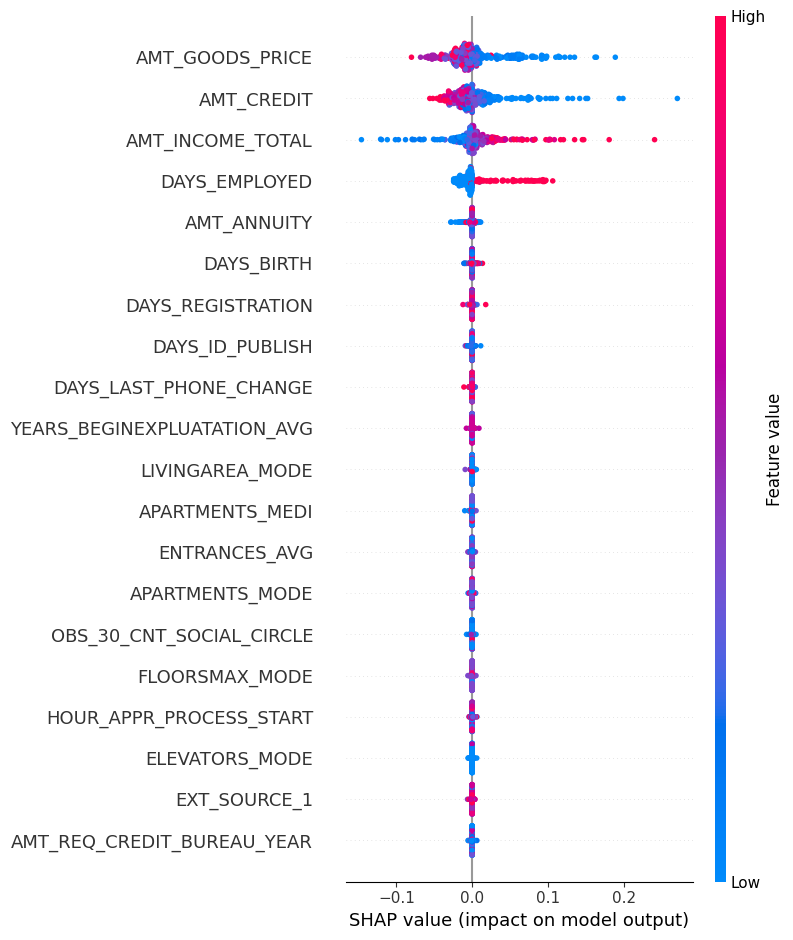

In [ ]:
import shap

# SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.
def f_wrapper(X):
    return model_nn.predict(X).flatten()

# Too many input data - use a random slice
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train_null, 20)

# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,X_train_summary)

# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
X_train_sample = X_train_null.sample(400)
shap_values  = explainer.shap_values(X_train_sample)
shap.summary_plot(shap_values, X_train_sample)